In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import numpy as np 
import pandas as pd 
import os

In [3]:
from __future__ import absolute_import, division, print_function
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import zipfile
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob, os, random

In [5]:
#Give dataset path
train_path = '/content/drive/MyDrive/1_final_thesis/train test valid /train'
test_path = '/content/drive/MyDrive/1_final_thesis/train test valid /test'


In [6]:
train_datagen = ImageDataGenerator(
   rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    
)

test_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

train_generator = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


test_generator = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Found 4379 images belonging to 12 classes.
Found 1245 images belonging to 12 classes.


In [7]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 224, 224, 3), (32, 12))

In [8]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)



{'baby': 0, 'bottle': 1, 'box': 2, 'defect': 3, 'electronics': 4, 'illegal': 5, 'luggage': 6, 'medicine': 7, 'metal': 8, 'person': 9, 'pet': 10, 'sport': 11}


In [9]:
path = 'labels.txt'
label = np.array(open(path).read().splitlines())

In [10]:
IMG_SHAPE = (224,224,3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [11]:
base_model.trainable = False

In [12]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(1024, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(12, activation='softmax')
])

In [13]:
model.compile(optimizer='adam', #Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
# batch_size = 32
# epochs = 5
# steps_per_epoch = train_generator.n // batch_size
# validation_steps = validation_generator.n // batch_size

history =model.fit(
  train_generator,
  validation_data=test_generator,
  epochs=5,
  steps_per_epoch=len(train_generator),
  validation_steps=len(test_generator),
     verbose=2,)

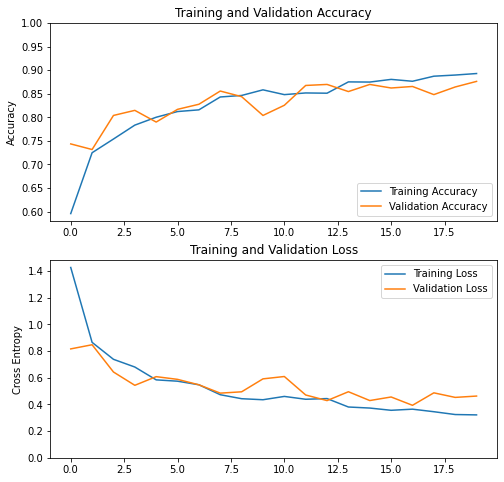

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
base_path = '/content/drive/MyDrive/1_final_dataset/train test valid /test'
img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

for i, img_path in enumerate(random.sample(img_list, 6)):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img, dtype=np.uint8)
    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

1/1 [==============================] - 0s 103ms/step
(1, 12)
illegal


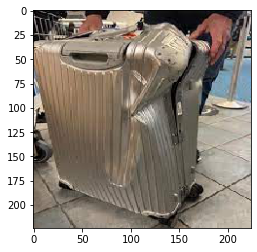

In [ ]:
img_path = '/content/drive/MyDrive/1_final_dataset/train test valid /test/defect/defect(282).jpg'
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img, dtype=np.uint8)
plt.imshow(img.squeeze())
p=model.predict(img[np.newaxis])
print(p.shape)
predicted_class = label[np.argmax(p)]
print(predicted_class)

# RUN TILL THIS CELL 

In [ ]:
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  154


In [ ]:
# from keras import optimizers
# import tensorflow as tf 


# adam = tf.keras.optimizers.Adam()
# model.compile(loss='categorical_crossentropy',
#               optimizer=adam,
#               metrics=['accuracy'])

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), #Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history_fine = model.fit(train_generator, 
                                   steps_per_epoch = steps_per_epoch,
                                   epochs=epochs, 
                                   workers=4,
                                   validation_data=validation_generator, 
                                   validation_steps=validation_steps) 

Epoch 1/10
77/77 [==============================] - 152s 2s/step - loss: 0.2114 - accuracy: 0.9310 - val_loss: 1.1150 - val_accuracy: 0.8550
Epoch 2/10
77/77 [==============================] - 142s 2s/step - loss: 0.1617 - accuracy: 0.9481 - val_loss: 0.9871 - val_accuracy: 0.8650
Epoch 3/10
77/77 [==============================] - 170s 2s/step - loss: 0.1649 - accuracy: 0.9496 - val_loss: 0.9279 - val_accuracy: 0.8625
Epoch 4/10
33/77 [===========>..................] - ETA: 1:10 - loss: 0.1130 - accuracy: 0.9659

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


77/77 [==============================] - 166s 2s/step - loss: 0.1387 - accuracy: 0.9554 - val_loss: 0.8745 - val_accuracy: 0.8925
Epoch 5/10
77/77 [==============================] - 170s 2s/step - loss: 0.1297 - accuracy: 0.9610 - val_loss: 0.9504 - val_accuracy: 0.9000
Epoch 6/10
77/77 [==============================] - 170s 2s/step - loss: 0.1376 - accuracy: 0.9610 - val_loss: 0.9052 - val_accuracy: 0.8925
Epoch 7/10
77/77 [==============================] - 151s 2s/step - loss: 0.1144 - accuracy: 0.9635 - val_loss: 0.7389 - val_accuracy: 0.8925
Epoch 8/10
77/77 [==============================] - 167s 2s/step - loss: 0.1417 - accuracy: 0.9619 - val_loss: 0.9789 - val_accuracy: 0.8800
Epoch 9/10
77/77 [==============================] - 172s 2s/step - loss: 0.0947 - accuracy: 0.9675 - val_loss: 1.5286 - val_accuracy: 0.8225
Epoch 10/10
77/77 [==============================] - 173s 2s/step - loss: 0.1385 - accuracy: 0.9602 - val_loss: 0.7019 - val_accuracy: 0.8900


In [ ]:
accuracy += history_fine.history['accuracy']
val_accuracy += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

In [ ]:
model.save("belt.h5")

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('belt.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("belt.tflite", "wb").write(tflite_model)

14774368

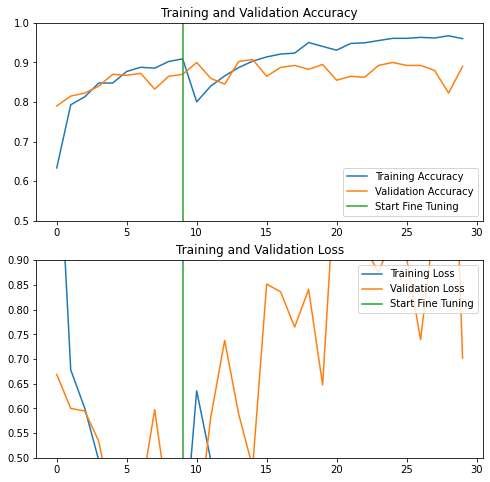

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.ylim([0.5, 1])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0.5, 0.9])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [ ]:
# tf.lite.TFLiteConverter.from_saved_model("saved_model", input_shapes={("image_tensor" : [1,300,300,3])})


In [ ]:
saved_model_dir = '../'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('belt.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
import PIL.Image as Image

img=Image.open(img_path).resize((224, 224))


1/1 [==============================] - 0s 63ms/step
(1, 12)
7


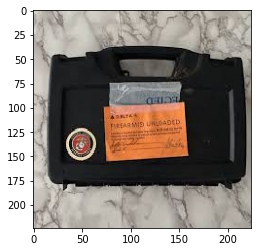

In [ ]:
img_path = '/content/drive/MyDrive/Thesis - defense/Dataset for Transfer Learning/Luggage/luggage (100).jpg'

img=np.array(img)/255.0
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img, dtype=np.uint8)
plt.imshow(img.squeeze())
p=model.predict(img[np.newaxis, ...])
print(p.shape)
predicted_class = np.argmax(p[0], axis=-1)
print(predicted_class)